<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Introduction
A look at KE CHP performance based on HH registration (site size) quintiles. 

In [11]:
## Setup
# load libs/modules
%run "../utils/load_envz.ipynb"

In [2]:
# Load data set 
DATA_DIR = "../dataset"
DATA_FILE = "all_KE_CHVs_data_1493.csv" 
dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE) )

#dataset.shape
#dataset.dtypes


In [3]:
## themes | variable - outcome mapping
argz_Units = ["CHP ID", "Households Registered"] 
argz_Ops = [ "Sales", "Community Events"]
argz_pregoz = [ "Pregnancy", "PNC Visit Rate", "PNC Visit Missed - #"]
argz_U1_care = ["Total U1 Assessments", "Total U1 Treatments"]
argz_malaria = [ "All Malaria Assessments", "All Malaria Treatments", "Act 6pack Issue", "mRDT Used", "%mRDT"]
argz_U5_diseases = ["U5 Malaria", "U5 Diarrhea", "U5 Pneumonia"]
argz_U5_care = ["Total U5 Assessments", "Total U5 Treatments", "On Time Referral f/u Treatment U5", "Missed Visits"] 

argz_EPMs = ["Households Registered", "Sales", "Community Events", "Total U5 Assessments", "Total U1 Assessments", "Pregnancy"]

## Additional Columns
dataset["Country"] = "KE"
#dataset["HHQuintiles"] = pd.qcut( dataset["Households Registered"], 5, labels=["HH_Quint_1", "HH_Quint_2", "HH_Quint_3", "HH_Quint_4", "HH_Quint_5"])
dnul = pd.Series( ["Households Registered"]).apply( lambda x: quintilize(dataset, x, labelzPrefix="HH_Quints" ) )

dataset["Pct_Assessments_U1_in_U5"] = np.nan_to_num( dataset["Total U1 Assessments"] / dataset["Total U5 Assessments"] )
dataset["Pct_Treatments_U1_in_U5"] = np.nan_to_num( dataset["Total U1 Treatments"] / dataset["Total U5 Treatments"]  ) 
dataset["Pct_U5Malaria_in_U5"] = np.nan_to_num( dataset["U5 Malaria"] / dataset["Total U5 Assessments"] )
dataset["Pct_U5Diarrhoea_in_U5"] = np.nan_to_num( dataset["U5 Diarrhea"] / dataset["Total U5 Assessments"] ) 
dataset["Pct_U5Pneumonia_in_U5"] = np.nan_to_num( dataset["U5 Pneumonia"] / dataset["Total U5 Assessments"] )
dataset["Pct_U5Malaria_in_All"] = np.nan_to_num( dataset["U5 Malaria"] / dataset["All Malaria Assessments"] )

dataset["Pct_Treated_in_Assessed_U5"] = np.nan_to_num( dataset["Total U5 Treatments"] / dataset["Total U5 Assessments"] )
dataset["Pct_Ontime_Refferal_U5"] = np.nan_to_num( dataset["On Time Referral f/u Treatment U5"] / dataset["Total U5 Assessments"] )
dataset["Pct_TreatedMalaria_in_All"] = np.nan_to_num( dataset["All Malaria Treatments"] / dataset["All Malaria Assessments"] )

dataset["Ratio_mRDT_to_ACT"] = np.nan_to_num( dataset["mRDT Used"] / dataset["Act 6pack Issue"] )

dataset.replace([np.inf, -np.inf], 0, inplace=True)

print( " The variables")
dataset.dtypes 


 The variables


CHP ID                                 object
Pregnancy                               int64
PNC Visit Rate                        float64
PNC Visit Missed - #                    int64
Total U1 Assessments                    int64
Total U1 Treatments                     int64
Total U5 Assessments                    int64
Total U5 Treatments                     int64
U5 Malaria                              int64
U5 Diarrhea                             int64
U5 Pneumonia                            int64
On Time Referral f/u Treatment U5     float64
Missed Visits                           int64
%mRDT                                 float64
All Malaria Assessments                 int64
All Malaria Treatments                  int64
Act 6pack Issue                         int64
mRDT Used                               int64
Sales                                 float64
Community Events                        int64
Households Registered                   int64
Country                           

# Exploring
- Sample structure 
- Missing data 
- Distributions and outliers 

In [4]:
## Sample Structures 

sampleStructure(dataset, "Country") 
sampleStructure(dataset, "Quints_Households Registered")

CHP ID Households Registered                   Pregnancy  \
        # CHPs                 # HHs Avg.CHP.Size # Pregoz Cases   
Country                                                            
KE        1493                147956         99.0            408   

        All Malaria Assessments Total U5 Assessments Total U1 Assessments  
                # Malaria Cases        # Child Cases           # U1 Cases  
Country                                                                    
KE                         2986                 5393                 1216

CHP ID Households Registered               \
                             # CHPs                 # HHs Avg.CHP.Size   
Quints_Households Registered                                             
HH_Quints_1                     302                  9763         32.0   
HH_Quints_2                     305                 24417         80.0   
HH_Quints_3                     300                 29990        100.0   
HH_Quints_4                     288                 34575        120.0   
HH_Quints_5                     298                 49211        165.0   

                                  Pregnancy All Malaria Assessments  \
                             # Pregoz Cases         # Malaria Cases   
Quints_Households Registered                                          
HH_Quints_1                              19                     236   
HH_Quints_2                              84                     588   
HH_Quints_3                              86                     645   
HH_Quints_4                              89                     670   
HH_Quints_5                             130                     847   

                             Total U5 Assessments Total U1 Assessments  
                                    # Child Cases           # U1 Cases  
Quints_Households Registered                                            
HH_Quints_1                                   474                  100  
HH_Quints_2                                  1284                  269  
HH_Quints_3                                  1182                  257  
HH_Quints_4                                  1183                  273  
HH_Quints_5                                  1270                  317

In [5]:
print(" Checking Missing Data")
checkMissing( dataset )

 Checking Missing Data


('\nShape # records, # variables',
 (1493, 33),
 '\n\n\n Counts of Missing Values \n',
 CHP ID                               0
 Pregnancy                            0
 PNC Visit Rate                       0
 PNC Visit Missed - #                 0
 Total U1 Assessments                 0
 Total U1 Treatments                  0
 Total U5 Assessments                 0
 Total U5 Treatments                  0
 U5 Malaria                           0
 U5 Diarrhea                          0
 U5 Pneumonia                         0
 On Time Referral f/u Treatment U5    0
 Missed Visits                        0
 %mRDT                                0
 All Malaria Assessments              0
 All Malaria Treatments               0
 Act 6pack Issue                      0
 mRDT Used                            0
 Sales                                0
 Community Events                     0
 Households Registered                0
 Country                              0
 Quints_Households Registered    

Distribution based on HH registration as base for normal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B8BD69828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025B8BEAE4E0>]], dtype=object)

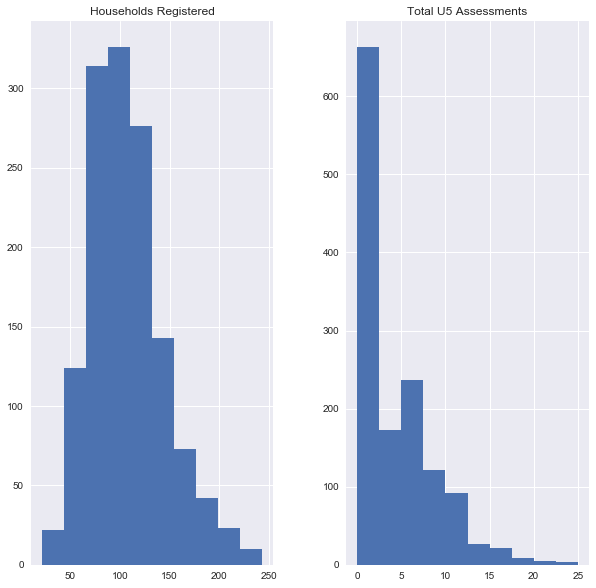

In [12]:
print( "Distribution based on HH registration as base for normal")
distributionz(dataset, ["Households Registered", "Total U5 Assessments"], "Quints_Households Registered")

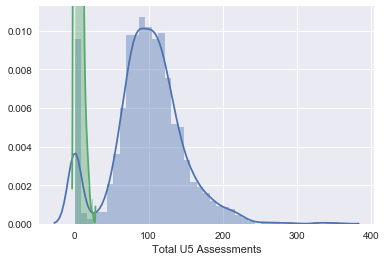

In [7]:
sns.distplot( dataset["Households Registered"])
sns.distplot( dataset["Total U5 Assessments"])

# Before Outliers


,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,...,Pct_Assessments_U1_in_U5,Pct_Treatments_U1_in_U5,Pct_U5Malaria_in_U5,Pct_U5Diarrhoea_in_U5,Pct_U5Pneumonia_in_U5,Pct_U5Malaria_in_All,Pct_Treated_in_Assessed_U5,Pct_Ontime_Refferal_U5,Pct_TreatedMalaria_in_All,Ratio_mRDT_to_ACT
count,1353.00,1353.00,1353.00,1353.00,1353.00,1353.00,1353.00,1353.00,1353.00,1353.00,...,1353.00,1353.00,1353.00,1353.00,1353.00,1353.00,1353.00,1353.00,1.353000e+03,1353.000000
mean,0.30,0.14,0.16,0.89,0.36,3.94,1.84,1.08,0.37,0.39,...,0.14,0.10,0.17,0.08,0.07,0.23,0.31,0.04,1.328672e+305,inf
std,0.65,0.34,0.41,1.33,0.82,4.43,2.85,2.17,0.84,0.98,...,0.21,0.22,0.28,0.18,0.17,0.36,0.41,0.11,inf,inf
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000
50%,0.00,0.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.000000e+00,0.000000
75%,0.00,0.00,0.00,1.00,0.00,7.00,3.00,1.00,0.00,0.00,...,0.25,0.00,0.25,0.00,0.00,0.50,0.57,0.00,6.700000e-01,1.000000
max,4.00,1.00,3.00,9.00,6.00,25.00,23.00,18.00,10.00,10.00,...,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,inf,inf


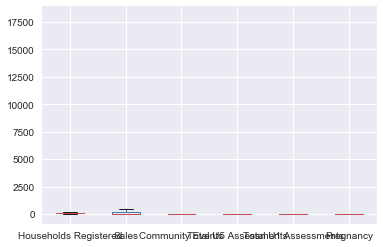

In [13]:
# summarize
summarizer(dataset)

dataset[argz_EPMs].boxplot()

(1353, 33)

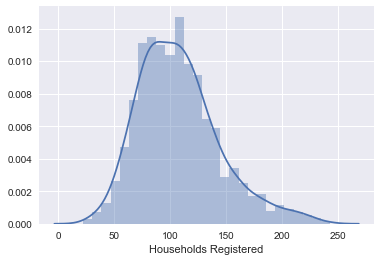

In [9]:
## Remove outliers
# updating dataset to HH > 20 and < 250 
dt_outliers = dataset[ (dataset["Households Registered"] < 20) | (dataset["Households Registered"] > 250) ]
dataset.drop( dt_outliers.index, inplace=True) #<< TODO: go back to boolean indexing
dataset.shape
sns.distplot( dataset["Households Registered"]) 
